<a href="https://colab.research.google.com/github/hyelim-kim1028/NLP/blob/main/tensorflow2%26ml_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#텐서플로2와 머신러닝으로 시작하는 자연어처리 

출판사: 위키북스

#01. 들어가며

In [ ]:
# clone the git rep on colab <!git clone ~> 
!git clone https://github.com/hyelim-kim1028/tensorflow-ml-nlp-tf2.git

Cloning into 'tensorflow-ml-nlp-tf2'...
remote: Enumerating objects: 1715, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (79/79), done.
remote: Total 1715 (delta 42), reused 9 (delta 5), pack-reused 1631
Receiving objects: 100% (1715/1715), 201.17 MiB | 22.29 MiB/s, done.
Resolving deltas: 100% (1032/1032), done.
Checking out files: 100% (88/88), done.


In [ ]:
# 필요 라이브버리 설치 <!pip install ~>  
#!pip install -r requirements.txt
!pip install tensorflow

In [ ]:
import tensorflow as tf

#02.자연어 처리 개발 준비

- 텐서플로 
- 사이킷런 
- 자연어 토크나이징 도구
- 그 밖의 라이브러리 (전처리) 

In [ ]:
# tf.keras.layers 
# y = f(Wx + b)

W = tf.Variable(tf.random.uniform([5,10], -1.0, 1.0))
b = tf.Variable(tf.zeros([10]))

y = tf.matmul(W, x) + b
# NameError: name 'x' is not defined 



NameError: ignored

In [ ]:
# Dense층 객체에 입력값 설정  
#1. Dense객체 생성 및 입력값 설정 
dense = tf.keras.layers.Dense(...)
output = dense(input)

#2. 객체 생성 시 입력값 설정 
output = tf.keras.layers.Dense(...)(input)


In [ ]:
#Dense 층에 가중치, 편향 초기화 방법, 활성화 함수의 종류 옵션 설정 

__init__(
    units,
    activation = None, # 활성화 함수 
    use_bias = True,  #가중치 
    kernel_initializer = 'glorot_uniform',# 가중치 초기화 
    bias_initializer = 'zeros', # 편향 초기화 
    kernel_regularizer = None, 
    bias_regularizer = None,
    activity_regularizer = None, 
    kernel_constraint = None, 
    bias_constraint = None, 
    **kwargs 
)

In [ ]:
# 신경망 생성 
INPUT_SIZE = (20, 1)

inputs = tf.keras.layers.Input(shape = INPUT_SIZE)
hidden = tf.keras.layers.Dense(units=10, activation = tf.nn.sigmoid)(inputs) #10의 노드 은닉층 
output  = tf.keras.layers.Dense(units = 2, activation = tf.nn.sigmoid)(hidden) #2개의 출력 노드 

In [ ]:
# tf.keras.layers.Dropout

# 1. 객체 생성 후 다시 호출하면서 입력값 설정 
dropout = tf.keras.layers.Dropout(...)
output = dropout(input)

# 2. 객체 생성 시 입력값 설정 
output = tf.keras.layers.Dropout(...)(input)

__init__(
    rate, 
    noise_shape = None, 
    seed = None, 
    **kwargs 
)

In [ ]:
INPUT_SIZE = (20, 1)

inputs = tf.keras.layers.Input(shape = INPUT_SIZE)
dropout = tf.keras.layers.Dropout(rate = 0.5)(inputs)

# tf.keras.layers.dropout 
# 0.2 > 20%노드를 0으로 만든다 
# tf.nn.dropout 
# 0.2 > 80%의 노드를 0으로 만든다 

In [ ]:
#dense층 신경망 구조에 드롭아웃 적용 

inputs = tf.keras.layers.Input(shape = INPUT_SIZE)
dropout = tf.keras.layers.Dropout(rate=0.2)(input)
hidden = tf.keras.layers.Dense(units = 10, activation = tf.nn.sigmoid)(dropout)
output = tf.keras.layers.Dense(units = 2, activation = tf.nn.sigmoid )(hidden)


In [ ]:
# 1. 객체 생성 후 다시 호출하면서 입력값 설정 
conv1d = tf.keras.layers.Conv1D(...)
output = conv1d(input)

# 2. 객체 생성 시 입력값 설정 
output = tf.keras.layers.Conv1D(...)(input)

# 객체 생성 시 전달 인자 
__init__(
    filters, # 몇개의 필터 사용 
    #conv1D는 필터의 가로 길이만 설정 #세로는 1D는 상관 없음 
    kernel_size, #필터의 가로 길이 
    strides = 1,
    padding = 'valid',
    data_format = 'channels_last',
    dilation_rate = 1,
    activation = None, 
    use_bias = True, 
    kernel_initializer = 'glorot_uniform',
    bias_initializer = 'zeros',
    kernel_regularizer = None, 
    bias_regularizer = None, 
    activity_regularizer = None, 
    kernel_constraint = None, 
    bias_constraint = None, 
    **kwargs 
)

In [ ]:
# conv1D를 사용한 합성곱 신경망 

INPUT_SIZE = (1,28,28)

inputs = tf.keras.Input(shape = INPUT_SIZE)
conv = tf.keras.layers.Conv1D(
    filters = 10,
    kernel_size = 3,
    padding = 'same',
    activation = tf.nn.relu
)(inputs)

In [ ]:
# dropout 적용 

INPUT_SIZE = (1, 28, 28)

inputs = tf.keras.Input(shape = INPUT_SIZE)
dropout = tf.keras.layers.Dropout(rate = 0.2)(inputs)
conv = tf.keras.layers.Conv1D(filters = 10, kernel_size = 3, padding = 'same', activation = tf.nn.relu)(dropout)

In [ ]:
# tf.keras.layers.MaxPool1D 
# feature map의 크기를 줄이거나 주요한 특징을 뽑아내기 위해 합성곱 이후에 적용 
# max pooling: 최댓값만 뽑아냄 #average pooling: 평균값만 뽑아냄 

# MaxPool1D, MaxPool2D, MaxPool3D 

# 1. 객체 생성 후 apply 함수를 이용해 입력값 설정 
max_pool = tf.keras.layers.MaxPool1D(...)
max_pool.apply(input)

# 2. 객체 생성 시 입력값 설정 
max_pool = tf.keras.layers.MaxPool1D(...)(input)

__init__(
    pool_size = 2, #필터의 크기 
    strides = None, # 적용할 스트라이드 값 
    padding = 'valid', # same or valid 
    data_format = None, #channel_last = (batch, length, channels) #channel_first = (batch, channels, length) 
    **kwargs
)

In [ ]:
# maxpooling, dropout 적용 

INPUT_SIZE = (1, 28, 28)

inputs = tf.keras.Input(shape = INPUT_SIZE)
dropout = tf.keras.layers.Dropout(rate = 0.2)(input)
conv = tf.keras.layers.Conv1D(
    filters = 10,
    kernel_size = 3,
    padding = 'same',
    activation = tf.nn.relu
)(input)
max_pool = tf.keras.layers.MaxPool1D(pool_size = 3, padding = 'same')(conv)
flatten = tf.keras.layers.Flatten()(max_pool)
hidden = tf.keras.layers.Dense(units=50, activation = tf.nn.relu)(flatten)
output = tf.keras.layers.Dense(units = 10, activation = tf.nn.softmax)(hidden)

- API clean up 
- Eager Execution 
- No more globals 
- Functions, not sessions 

#- model construction (Keras API) 
#  - Sequential API 
#  - Functional API 
#  - Functional/Sequential API 
#    +) Custom Layers 
#  - Subclassing (Custom Model) 


In [ ]:
# keras #Sequentail API # simpy Fully-connected layer 

from tensorflow.keras import layers 

model = tf.keras.Sequential()
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

# sequential 
# stack 형에는 접합하지만, 복잡한 구조에는 어려움 
# 다중 입력값 모델 (Multi-input models)
# 다중 출력값 모델 (Multi-output models)
# 공유 층을 활용하는 모델 (Models with shared layers)
# 데이터 흐름이 순차적이지 않은 모델 (Models with non-sequential data flows)
# Functional API or subclassing 방식 사용 

In [ ]:
# Functional API 
inputs = tf.keras.Input(shape=(32,)) # = tf.placeholder0
x = layers.Dense(64, activation = 'relu')(inputs)
x = layers.Dense(64, activation = 'relu')(x)
predictions = layers.Dense(10, activation = 'softmax')(x)

In [ ]:
class CustomLayer(layers.layer):

  def __init__(self, hidden_dimension, hidden_dimension2, output_dimension):
    self.hidden_dimension = hidden_dimension 
    self.hidden_dimension2 = hidden_dimension2 
    self.output_dimension = output_dimension 
    super(CustomLayer, self).__init__()

  def build(self, input_shape): # 모델 가중치 
    self.dense_layer1 = layers.Dense(self.hidden_dimension, activation = 'relu')
    self.dense_layer2 = layers.Dense(self.hidden_dimension2, activation = 'relu')
    self.dense_layer3 = layers.Dense(self.output_dimenstion, activation = 'softmax')

  def call(self, inputs): # 층의 로직 정의 
    x = self.dense_layer1(inputs)
    x = self.dense_layer2(x)

    return self.dense_layer3(x)
    

In [ ]:
#sequential 모듈 활용 
from tensorflow.keras import layers 

model = tf.keras.Sequential()
model.add(CustomLayer(64, 64, 10))


In [ ]:
# Subclassing (Custom Model)

class MyModel(tf.keras.Model):

  def __init__(self, hidden_dimension, hidden_dimension2, output_dimension):
    # 모델에 사용될 층과 변수 정의 
    super(MyModel, self).__init__(name = 'my model')
    self.dense_layer1 = layers.Dense(hidden_dimension, activation = 'relu')
    self.dense_layer2 = layers.Dense(hidden_dimension2, activation = 'relu')
    self.dense_layer3 = layers.Dense(output_dimension, activation = 'softmax')
  
  def call(self, inputs):
    # 모델 연산 진행 
    x = self.dense_layer1(inputs)
    x = self.dense_layer2(x)

    return self.dense_layer3(x)


#모델 학습 

1) keras 내장 API 활용 
(i.e. model.fit(), model.evaluate(), model.predict())

2) 학습, 검증, 예측 등 모든 과정을 GradientTape 객체를 활용해 직접 구현하는 방법 


In [ ]:
# 내장 API를 활용하는 방법 

# 1. 학습 과정 정의 
# 손실 함수 (loss function), 옵티마이저 (optimizer), 평가 지표 (metric)

#객체 형식 지정 
model.compie(optimizer = tf.keras.optimizers.Adam(),
             loss = tf.keras.losses.CategoricalCrossentropy(),
             metrics = [tf.keras.metrics.Accuracy()])

#문자열 형태 지정 
model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])



In [ ]:
model.fit(x_train, y_train, 
          batch_size = 64, 
          epochs = 3, 
          validation_data = (x_val, y_val))
          # epoch 마다 검증 결과를 보기 위해서는 
          # fit 함수의 검증 데이터를 추가로 넣으면 된다 



In [ ]:
# 더미 데이터를 활용한 감정 분석 모델링 

# 입력값: 단어 > 임베딩 벡터 
# 백터 평균 > 하나의 백터 
# 결과값: 시그모이드, 0~1 

# 모델 구현 

import tensorflow as tf 
from tensorflow.keras import preprocessing

samples = ['너 오늘 이뻐 보인다',
           '나는 오늘 기분이 더러워',
           '끝내주는데, 좋은 일이 있나봐',
           '나 좋은 일이 생겼어',
           '아 오늘 진짜 짜증나',
           '환상적인데, 정말 좋은거 같아']

labels = [[1],[0],[1],[1],[0],[1]]
tokenizer = preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples)

word_index = tokenizer.word_index

In [ ]:
# 모델 구축 및 모델 학습에 필요한 변수 정의 

batch_size = 2
num_epochs = 100 
vocab_size = len(word_index) + 1
# 모델 하이퍼 파라미터 (임베딩 층, 은닉층, 출력층)
emb_size = 128 
hidden_dimension= 256 
output_dimension = 1 

In [ ]:
# Sequential API 를 활용한 심층 신경망 모델 

#방법 1 # Sequential 객체 생성 후 각 층 추가 
model = tf.keras.Sequential() 
model.add(layers.Embedding(vocab_size, emb_size, input_length = 4))
model.add(layers.Lambda(lambda x: tf.reduce_mean(x, axis = 1)))
model.add(layers.Dense(hidden_dimension, activation = 'relu'))
model.add(layers.Dense(output_dimension, activation = 'sigmoid'))

# 방법 2 # 객체 생성 시 인자로 사용할 층을 순차적으로 리스트로 만들어서 전달 
model = tf.keras.Sequential([
layers.Embedding(vocab_size, emb_size, input_length = 4),
layers.Lambda(lambda x: tf.reduce_mean(x, axis = 1)),
layers.Dense(hidden_dimension, activation = 'relu'),
layers.Dense(output_dimension, activation = 'sigmoid')                             
])

# 입력값 embdding 층 추가 
# 임베딩 된 단어의 백터 평균 > lambda층 사용 
# 0~1 사이 > sigmoid 사용 

#모델 컴파일 메서드 # 학습 과정 정의 
# 옵티마이저 > Adam 최적화 
# 이진분류 > binary cross-entropy 
# 모델 측정 지표 > accuracy 

model.compile(optimizer =  tf.keras.optimizers.Adam(0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy']) 

# fit 메서드 # 학습 진행 
model.fit(input_sequences, lables, epochs = num_epochs, batch_size = batch_size)

In [ ]:
# Functional API으로 동일 구현 

inputs = layers.Input(shape = (4,))
embed_output = layers.Embedding(vocab_size, emb_size)(inputs)
pooled_output = tf.reduce_mean(embed_output, axis = 1)
hidden_layer = layers.Dense(hidden_dimension, activation = 'relu')(pooled_output)
outputs = layers.Dense(output_dimension, activation = 'sigmoid')(hidden_layer)
model = tf.keras.model(inputs = inputs, outputs = outputs)

model.compile(optimizer = tf.keras.optimizers.Adam(0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
model.fit(input_sequences, labels, epochs = num_epochs, batch_size = batch_size)

In [ ]:
# Subclassing으로 모델 구현 

class CustomModel(tf.keras.Model):

  def __init__(self, vocab_size, embed_dimension, hidden_dimension, output_dimension):
    super(CustomModel, self).__init__(name = 'my_model')
    self.embedding = layers.Embedding(vocab_size,embed_dimension)
    self.dense_layer = layers.Dense(hidden_dimension, activation = 'relu')
    self.output_layer = layers.Dense(output_dimension, activation = 'sigmoid')

  def call(self, inputs):
    x =self.embedding(inputs)
    x = tf.reduce_mean(x, axis = 1)
    x = self.dense_layer(x)
    x = self.output_layer(x)

    return x 

model = CustomModel(vocab_size = vocab_size, 
                    embed_dimension = embed_size,
                    hidden_dimension = hidden_dimension, 
                    output_dimension = output_dimension)

model.compile(optimizer = tf.keras.optimizers.Adam(0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(input_sequences, labels, epochs = num_epochs, batch_size = batch_size)



tensorflow 공식 API 문서

www.tensorflow.org/api_docs/python/tf

#Scikit-learn 

- 머신러닝을 위한 파이썬 라이브러리 
<> 딥러닝: tensorflow, keras, pytorch 

- 지도학습 모듈
    - Naive Bayes 
    - Decision Trees 
    - Support Vector Machines 
- 비지도학습 모듈
    - Clustering (군집화) 
    - Gaussian mixture models 
- 모델 선택 및 평가를 위한 모듈
    - 모델 교차 검증 (Cross validation) 
    - 모델 평가 (Model evaluation) 
- 데이터 변환 및 데이터 불러오기 모듈
    - pipeline 
    - feature extraction
    - preprocessing data
    - dimensionality reduction 
- 계산 성능 향상 모듈 


In [ ]:
# scikit-learn 설치 
!pip install scikit-learn

In [ ]:
import sklearn 
sklearn.__version__

'0.22.2.post1'

In [ ]:
# 하나의 데이터 #iris # 두가지 분류모델 
# 1. 지도학습모델 (K-nearest neighbor classifier)
# 2. 비지도학습모델 (k-means clustering)

from sklearn.datasets import load_iris # iris 내장 데이터 불러오기 

# 변수 할당 # 데이터 구성 출력 
iris_dataset = load_iris()
print("iris_dataset key: {}".format(iris_dataset.keys()))

print(iris_dataset['data'])
print("shape of data: {}".format(iris_dataset['data'].shape))

iris_dataset key: dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6

In [ ]:
print(iris_dataset['feature_names'])
print(iris_dataset['target'])
print(iris_dataset['target_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


In [ ]:
print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

#Scikit-learn을 활용한 데이터 분리 

- 학습 데이터 > 학습 데이터 & 평가 데이터 


In [ ]:
from sklearn.model_selection import train_test_split

train_input,test_input, train_label, test_label = train_test_split(iris_dataset['data'], iris_dataset['target'],test_size = 0.25, random_state = 42)
# test_size = 0~1 

print("shape of train_input: {}".format(train_input.shape)) #112, 4
print("shape of test_input:{}".format(test_input.shape)) #38, 4
print("shape of train_label: {}".format(train_label.shape)) #112, 
print("shape of test_label: {}".format(test_label.shape))#38, 

# 학습데이터, 평가 데이터, 검증 데이터 
# 학습 데이터: 모델 학습 > 검증 데이터: 모델 검증 및 하이퍼파라미터 수정 > 평가 데이터  

shape of train_input: (112, 4)
shape of test_input:(38, 4)
shape of train_label: (112,)
shape of test_label: (38,)


In [ ]:
# Scikit-learn 지도학습 
# K-nearest neighbor classifier 
# k: 예측하고자 하는 데이터와 가까운 몇개의 데이터를 참고할 것인가 

from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(train_input, train_label) #모델에 학습데이터 & 라벨값 적용 

KNeighborsClassifier(algorithm = 'auto', leaf_size = 30, metric = 'minkowski',
                     metric_params = None, n_jobs = 1,n_neighbors = 1, p = 2, 
                     weights = 'uniform')

# 새로운 데이터 라벨 예측 

#임의의 피쳐값 설정 
import numpy as np 
new_input = np.array([[6.1, 2.8, 4.7, 1.2]])
knn.predict(new_input) # 1 = Versicolor 로 예측 

# 평가 데이터로 예측 
predict_label = knn.predict(test_input)
print(predict_label)

print('test accuracy {:.2f}'.format(np.mean(predict_label == test_label)))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
# Scikit-learn을 활용한 비지도 학습 

# k개 만큼 중심 설정 
# 같은 중심 = 같은 군집 

from sklearn.cluster import KMeans 
import numpy as np

k_means = KMeans(n_clusters = 3) # 3 = 군집 개수 설정 

k_means.fit(train_input) # 군집화 모델에 데이터 적용 

# print('test accuracy {:.2f}'.format(np.mean(predict_label == test_label)))

# 레이블 값 확인 
k_means.labels_

# 각 군집의 종의 분포 확인 
print("0 cluster :", train_label[k_means.labels_== 0])
print("1 cluster :", train_label[k_means.labels_ == 1])
print("2 cluster :", train_label[k_means.labels_== 2])
# 결과는 군집화 될 때마다 변함 


# 임의의 새로운 데이터를 만들어서 진행 (예측)
new_input = np.array([[6.1, 2.8, 4.7, 1.2]])
prediction = k_means.predict(new_input)
print(prediction)

# 평가 데이터 적용 # 실제 라벨과 비교 # 성능 측정 
predict_cluster = k_means.predict(test_input)
print(predict_cluster)

# 평가 데이터 적용 예측 군집 #붓꽃의 종 라벨 # 실제 라벨과 성능 비교 
np_arr = np.array(predict_cluster)
np_arr[np_arr == 0], np_arr[np_arr==1], np_arr[np_arr==2] = 3,4,5
np_arr[np_arr==3] = 1
np_arr[np_arr==4] = 0 
np_arr[np_arr==5] = 2
predict_label = np_arr.tolist()
print(predict_label)

#실제 라벨과 성능 비교 
print('test accuracy {:2f}'.format(np.mean(predict_label == test_label)))

array([1, 1, 2, 2, 2, 1, 1, 2, 2, 0, 2, 0, 2, 0, 2, 1, 0, 2, 1, 1, 1, 2,
       2, 1, 1, 1, 2, 1, 2, 0, 1, 2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 2, 0, 1,
       1, 2, 0, 1, 2, 1, 1, 2, 2, 0, 2, 0, 0, 2, 1, 1, 2, 0, 1, 1, 1, 2,
       0, 1, 0, 0, 1, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2,
       0, 0, 1, 2, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 2, 2, 2, 2, 1, 2, 2, 1,
       2, 0], dtype=int32)

#사이킷런을 이용한 특징 추출

- 자연어 처리에서의 특징 추출 
- 텍스트 데이터 (단어 or 문장) > 어떤 특징 값으로 바꿔줌 > 수치화 

- Text to Vector 

1) CountVectorizer # 횟수 기준 

    - 객체 만들기 
    - 특정 텍스트를 적합 
    - 적합: 횟수를 셀 단어의 목록 만들기 
    - 횟수를 기준으로 텍스트 벡터화 

2) TfidfVectorizer # TF-IDF

    - 

3) HashingVectorizer # 횟수 기준 #함수 사용 # 시간 down # 데이터 크기가 클수록 효율적 

In [ ]:
# CountVectorizer 

from sklearn.feature_extraction.text import CountVectorizer 
# sklearn.feature_extraction.text: 특징 추출 모듈 

# 텍스트 데이터 
text_data = ['나는 배가 고프다', '내일 점심 뭐먹지','내일 공부 해야겠다','점심 먹고 공부 해야지']
count_vectorizer = CountVectorizer()
count_vectorizer.fit(text_data)
print(count_vectorizer.vocabulary_) # 데이터 사전 출력 

sentence = [text_data[0]]
print(count_vectorizer.transform(sentence).toarray())


{'나는': 2, '배가': 6, '고프다': 0, '내일': 3, '점심': 7, '뭐먹지': 5, '공부': 1, '해야겠다': 8, '먹고': 4, '해야지': 9}
[[1 0 1 0 0 0 1 0 0 0]]


In [ ]:
# TfidfVectorizer 
# TF: term frequency - 특정 단어가 단어의 데이터 안에서 등장하는 횟수 
# DF: document frequency - 문서 빈도값, 특정 단어가 여러 데이터에 자주 등장하는가 지표 
# IDF: Inverse frequency - DF의 역수 (특정 단어가 등장하지 않을수록 값이 커진다)
# TF * IDF : 단어X가 해당 문서에 자주 등장하지만, 다른 문서에는 많이 없는 단어 일수록 높은 값 부여 

from sklearn.feature_extraction.text import TfidfVectorizer 

text_data = ['나는 배가 고프다', '내일 점심 뭐먹지','내일 공부 해야겠다','점심 먹고 공부 해야지']
tfidf_vectorizer = TfidfVectorizer()

tfidf_vectorizer.fit(text_data)
print(tfidf_vectorizer.vocabulary_)

sentence = [text_data[3]]
print(tfidf_vectorizer.transform(sentence).toarray())

{'나는': 2, '배가': 6, '고프다': 0, '내일': 3, '점심': 7, '뭐먹지': 5, '공부': 1, '해야겠다': 8, '먹고': 4, '해야지': 9}
[[0.         0.43779123 0.         0.         0.55528266 0.
  0.         0.43779123 0.         0.55528266]]


# 자연어 토크나이징 도구 
- 단어/형태소/문장 토크나이징 

- 영어 
  - NLTK (Natural Language Toolkit) 
  - Spacy 
- 한글 

In [ ]:
#NLTK 
# !pip install nltk

# 말뭉치 연동
import nltk 
# nltk.download() # too many steps and options 
# solution: https://stackoverflow.com/questions/49085673/download-all-nltk-packages-in-google-colaboratory-at-once
nltk.download('all-nltk')

[nltk_data] Downloading collection 'all-nltk'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   U

True

In [ ]:
# 토크나이징
# 특정 기준 단위로 문장을 나누는 것 

# 단어 단위 토크나이징 
from nltk.tokenize import word_tokenize
sentence = "Natural language processing (NLP) is a subfield of computer science, information engineering, \
            and artificial intelligence concerned with the interactions between computers and human (natural) languages, \
            in particular how to program computers to process and analyze large amoungs of natural language data."

print(word_tokenize(sentence))

# 문장 단위 토크나이징 
# 문단 > 문장 > 단어 

from nltk.tokenize import sent_tokenize 
paragraph = "Natural language processing (NLP) is a subfield of computer science, \
information engineering, and artificial intelligence concerned with the interactions \
between computers and human (natural) languages, in particular how to program \
computers to process and anlyze large amounts of natural language data. \
Challenges in natural language processing frequently involve speech recognition, \
natural language understanding, and natural language generation "

print(sent_tokenize(paragraph))

LookupError: ignored

In [ ]:
# Spacy 

# install Spacy 
# !pip install spacy
# !python -m spacy download en # English ver. 

# 단어 토크나이징 
import spacy 

nlp = spacy.load('en')

sentence = "Natural language processing (NLP) is a subfield of computer science, information engineering, \
            and artificial intelligence concerned with the interactions between computers and human (natural) languages, \
            in particular how to program computers to process and analyze large amoungs of natural language data."

doc = nlp(sentence)
# print(doc) #splitted by ','

# list comprehension #check the result 
word_tokenized_sentence = [token.text for token in doc]
sentence_tokenized_list = [sent.text for sent in doc.sents]

print(word_tokenized_sentence)
print(sentence_tokenized_list)

Natural language processing (NLP) is a subfield of computer science, information engineering,             and artificial intelligence concerned with the interactions between computers and human (natural) languages,             in particular how to program computers to process and analyze large amoungs of natural language data.


In [ ]:
# 한글 토크나이징 라이브러리 #KoNLPy
# 강점: 형태소 분석기 
# 어절단위 분석은 NLTK 사용 가능 

# !pip install konlpy
import konlpy

# 형태소 분석기 
# 클래스 형태 > 객체 생성 > 매서드 호출 > 토크나이징 
# Hannanum, Kkma, Komoran, Mecab, Okt(Twitter)

from konlpy.tag import Okt 
okt = Okt()

# Okt객체 4제공함수 
# okt.morphs()
# okt.nouns()
# okt.phrases()
# okt.pos() #품사태깅 역할 


In [ ]:
text = "한글 자연어 처리는 재밌다 이제부터 열심히 해야지 ㅎㅎㅎ"

print(okt.morphs(text))
print(okt.morphs(text, stem = True)) # 형태소 단위로 나눈 후 어간을 추출
                                     # 해야지 > 하다 
print(okt.nouns(text))
print(okt.phrases(text))
print(okt.pos(text))
print(okt.pos(text, join = True))

['한글', '자연어', '처리', '는', '재밌다', '이제', '부터', '열심히', '해야지', 'ㅎㅎㅎ']
['한글', '자연어', '처리', '는', '재밌다', '이제', '부터', '열심히', '하다', 'ㅎㅎㅎ']
['한글', '자연어', '처리', '이제']
['한글', '한글 자연어', '한글 자연어 처리', '이제', '자연어', '처리']
[('한글', 'Noun'), ('자연어', 'Noun'), ('처리', 'Noun'), ('는', 'Josa'), ('재밌다', 'Adjective'), ('이제', 'Noun'), ('부터', 'Josa'), ('열심히', 'Adverb'), ('해야지', 'Verb'), ('ㅎㅎㅎ', 'KoreanParticle')]
['한글/Noun', '자연어/Noun', '처리/Noun', '는/Josa', '재밌다/Adjective', '이제/Noun', '부터/Josa', '열심히/Adverb', '해야지/Verb', 'ㅎㅎㅎ/KoreanParticle']


In [ ]:
#KoNLPy 데이터 
# kolaw # 한국 법률 말뭉치
from konlpy.corpus import kolaw
# kobill #국회 의안 말뭉치 
from konlpy.corpus import kobill

kolaw.open('constitution.txt').read()[:20]
kobill.open('1809890.txt').read() #~번 의안 


'지방공무원법 일부개정법률안\n\n(정의화의원 대표발의 )\n\n 의 안\n 번 호\n\n9890\n\n발의연월일 : 2010.  11.  12.  \n\n발  의  자 : 정의화․이명수․김을동 \n\n이사철․여상규․안규백\n\n황영철․박영아․김정훈\n\n김학송 의원(10인)\n\n제안이유 및 주요내용\n\n  초등학교 저학년의 경우에도 부모의 따뜻한 사랑과 보살핌이 필요\n\n한 나이이나, 현재 공무원이 자녀를 양육하기 위하여 육아휴직을 할 \n\n수 있는 자녀의 나이는 만 6세 이하로 되어 있어 초등학교 저학년인 \n\n자녀를 돌보기 위해서는 해당 부모님은 일자리를 그만 두어야 하고 \n\n이는 곧 출산의욕을 저하시키는 문제로 이어질 수 있을 것임.\n\n  따라서 육아휴직이 가능한 자녀의 연령을 만 8세 이하로 개정하려\n\n는 것임(안 제63조제2항제4호).\n\n- 1 -\n\n\x0c법률  제        호\n\n지방공무원법 일부개정법률안\n\n지방공무원법 일부를 다음과 같이 개정한다.\n\n제63조제2항제4호 중 “만 6세 이하의 초등학교 취학 전 자녀를”을 “만 \n\n8세 이하(취학 중인 경우에는 초등학교 2학년 이하를 말한다)의 자녀를”\n\n로 한다.\n\n부      칙\n\n이 법은 공포한 날부터 시행한다.\n\n- 3 -\n\n\x0c신 ·구조문대비표\n\n현      행\n\n개   정   안\n\n제63조(휴직) ① (생  략)\n\n제63조(휴직) ① (현행과 같음)\n\n  ② 공무원이 다음 각 호의 어\n\n  ② -------------------------\n\n느 하나에 해당하는 사유로 휴\n\n----------------------------\n\n직을 원하면 임용권자는 휴직\n\n----------------------------\n\n을 명할 수 있다. 다만, 제4호\n\n-------------.---------------\n\n의 경우에는 대통령령으로 정\n\n---------------------------

In [ ]:
# 그 밖의 라이브러리 
# 1. numpy 
# 2. pandas 
# 3. matplotlib 
# 4. Re 
# 5. BeautifulSoup 

# Numpy 

import numpy as np 

a = np.array([1,2,3])
print(a)

a = np.array([[1,2,3],[1,5,9],[3,5,7]])
print(a.ndim)
print(a.shape)
print(a.size)
print(a.dtype)

[1 2 3]
2
(3, 3)
9
int64


In [ ]:
# 배열 생성 여러가지 방법들 

# numpy.zeros 
a = np.zeros((2,3)) #원소가 모두 0인 배열 
print(a)

# numpy.ones 
b = np.ones((2,1))
print(b)

# numpy.empty 
c = np.empty((2,2))
print(c)

# numpy.arange 
d = np.arange(10, 30, 5)
print(d)

# numpy.full 
e = np.full((2,2),4)
print(e)

# mumpy.eye 
f = np.eye(3)
print(f)

# numpy.random.random 
g = np.random.random((2,2))
print(g)


[[0. 0. 0.]
 [0. 0. 0.]]
[[1.]
 [1.]]
[[2.e-323 2.e-323]
 [2.e-323 2.e-323]]
[10 15 20 25]
[[4 4]
 [4 4]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[0.8666983  0.15138327]
 [0.86900499 0.36487732]]


In [ ]:
a = np.array([1,2,3])
b = np.array([10,20,30])

print(a+b)
print(np.add(a,b))
print(b-a)
print(np.subtract(b,a))
print(a**2)
print(b<15)


[11 22 33]
[11 22 33]
[ 9 18 27]
[ 9 18 27]


In [ ]:
import numpy as np 
C = np.array([[1,2],[3,4]])
D = np.array([[10,20], [30,10]])

print(C*D)
print(np.dot(C,D))
print(C.dot(D))

[[10 40]
 [90 40]]
[[ 70  40]
 [150 100]]
[[ 70  40]
 [150 100]]


In [ ]:
# axis를 기준으로 하는 연산 
a = np.array([[1,2,3,4], 
              [5,6,7,8],
              [1,3,5,7]])

print(a.sum(axis = 0)) #0축, y축, 열을 기준으로 한 덧셈 
print(a.sum(axis=1)) #1축, x축, 행을 기준으로 한 덧셈 
print(a.max(axis=1))


[ 7 11 15 19]
[10 26 16]
[4 8 7]


In [ ]:
# Numpy array/ indexing, slicing 
# indexing: 배열에서 특정 원소를 뽑아내는것 
# slicing: 배열에서 특정 구간을 뽑아내는 것 

a= np.array([1,2,3,4,5,6,7])
print(a[3])

print(a[-1])
print(a[2:5])
print(a[2:])
print(a[:4])

a = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])

print(a[1,2]) 
print(a[:,1]) #1열의 모든 원소 
print(a[-1]) #마지막 행  


4
7
[3 4 5]
[3 4 5 6 7]
[1 2 3 4]
6


In [ ]:
# 넘파이를 이용한 배열 형태 변환 
# ndarray.ravel(): 배열을 1차원 배열로 만든다 
# ndarray.reshape(): 배열의 형태를 바꾼다 
# ndarray.T : 트랜스포즈된 배열을 만든다. 행렬의 트랜스포즈와 같다; 열 <>행 

a= np.array([[1,2,3,4],
             [5,6,7,8],
             [9, 10,11, 12]])

print(a.ravel()) #1차원 백터 

print(a.reshape(2,6)) #2행, 6열 

print(a.T)

# reshape의 경우 특정 행, 열만 지정해도 나머지는 자동으로 맞출 수 있다 
print(a.reshape(3, -1)) #3행만 지정, 열에 -1을 넣으면 자동으로 배열을 맞춘다 

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]]
[[ 1  5  9]
 [ 2  6 10]
 [ 3  7 11]
 [ 4  8 12]]
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [ ]:
#numpy broadcasting 
# 다른 형태의 배열끼리도 연산이 가능 

a = np.array([[1,2,3],[4,5,6],[7,8,9]])
b = np.array([1,0,1])
y = np.empty_like(a) #배열이 a와 크기가 같은 원소가 비어있는 배열 생성 

# 배열 b를 각 행에 더해주기 위해 반복문 사용 
for i in range(3):
  y[i, :] = a[i,:]+b

print(y)

# broadcasting 
c = a + b
print(c)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]]
[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]]


#Pandas

In [ ]:
import pandas as pd

# 세가지 자료구조 
# 1) 시리즈 (Series) #1차원 
# 2) 데이터프레임 (DataFrame) #2차원 
# 3) 패널 (Panel) # 3차원 # 데이터프레임의 모음 

# 시리즈 생성 
# pandas.Series(data, index, dtype, copy)

a = pd.Series([1,3,5,7,10]) #리스트를 이용한 시리즈 데이터 생성 
print(a)

data = np.array(['a', 'b', 'c', 'd']) # numpy array 생성 
b = pd.Series(data)
print(b)

c = pd.Series(np.arange(10, 30, 5)) # 
print(c)

a = pd.Series(['a','b','c'], index = [10,20,30]) #인덱스 직접 지정 
print(a)

dict = {'a':10, 'b':20, 'c':30} #파이썬 딕셔너리를 활용한 시리즈 생성 
d = pd.Series(dict)
print(d)

0     1
1     3
2     5
3     7
4    10
dtype: int64
0    a
1    b
2    c
3    d
dtype: object
0    10
1    15
2    20
3    25
dtype: int64
10    a
20    b
30    c
dtype: object
a    10
b    20
c    30
dtype: int64


In [ ]:
# 데이터프레임 생성 
# pandas.DataFrame(data,index, columns, dtype, copy)

a = pd.DataFrame([1,3,5,7,9]) #리스트를 이용한 생성 
print(a)

dict = {'Name':['Cho','Kim','Lee'], 'Age':[28,31,38]}
b = pd.DataFrame(dict)
print(b)

c = pd.DataFrame([['apple', 7000], ['banana', 5000], ['orange', 4000]]) #리스트의 중첩에 의한 생성 
print(c)

d = pd.DataFrame([['apple', 7000], ['banana', 5000], ['orange', 4000]], columns = ['name', 'price'])
print(d)

   0
0  1
1  3
2  5
3  7
4  9
  Name  Age
0  Cho   28
1  Kim   31
2  Lee   38
        0     1
0   apple  7000
1  banana  5000
2  orange  4000
     name  price
0   apple   7000
1  banana   5000
2  orange   4000


In [3]:
# clone the git repo 
!git clone https://github.com/hyelim-kim1028/tensorflow-ml-nlp-tf2.git

from google.colab import drive
drive.mount('/content/drive/') 

fatal: destination path 'tensorflow-ml-nlp-tf2' already exists and is not an empty directory.
Mounted at /content/drive/


In [10]:
# 판다스 데이터 불러오기 및 쓰기 
# pandas.read_csv('file_path')

import pandas as pd

df = pd.read_csv('/content/tensorflow-ml-nlp-tf2/2.NLP_PREP/data_in/datafile.csv')
print(df)

# check column A
print(df['A'])
print('\n')

# check 3 rows of column A 
print(df['A'][:3])
print('\n')

# create column D (col A + col B)
df['D'] = df['A'] + df['B']
print(df['D'])

     Unnamed: 0         A         B    C
0    2018-02-03  0.076547 -0.410959  824
1    2018-02-04  0.810574  0.988997  255
2    2018-02-05  0.071555  0.772209  859
3    2018-02-06  0.319684  0.760100  551
4    2018-02-07  0.571791  0.162974  159
..          ...       ...       ...  ...
295  2018-11-25  0.961260 -0.160928  772
296  2018-11-26  0.412032  0.739386  171
297  2018-11-27  0.934486  0.496985  925
298  2018-11-28  0.072067  0.697545  919
299  2018-11-29  0.705263 -0.866304  146

[300 rows x 4 columns]
0      0.076547
1      0.810574
2      0.071555
3      0.319684
4      0.571791
         ...   
295    0.961260
296    0.412032
297    0.934486
298    0.072067
299    0.705263
Name: A, Length: 300, dtype: float64


0    0.076547
1    0.810574
2    0.071555
Name: A, dtype: float64


0     -0.334412
1      1.799571
2      0.843764
3      1.079784
4      0.734765
         ...   
295    0.800332
296    1.151419
297    1.431471
298    0.769612
299   -0.161041
Name: D, Length: 300, dty

In [11]:
df.describe()

,A,B,C,D
count,300.000000,300.000000,300.000000,300.000000
mean,0.504467,0.120235,517.743333,0.624702
std,0.283837,0.576256,283.187160,0.656320
min,0.003110,-0.981417,0.000000,-0.890799
25%,0.241881,-0.336614,282.250000,0.100411
50%,0.528009,0.224035,526.500000,0.767702
75%,0.750084,0.591710,754.250000,1.141083
max,0.994491,0.989536,996.000000,1.857518


#Matplotlib 


In [16]:
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline #jupyter notebook 내부 그림표시

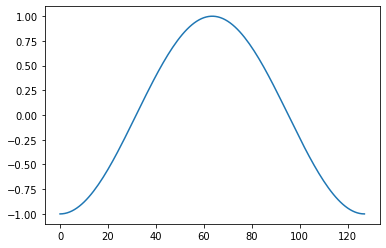

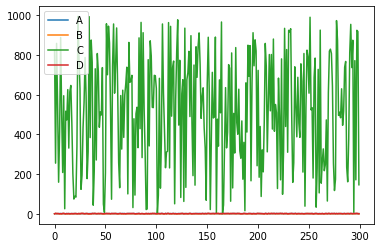

In [22]:
# 기본 그래프 
# X = [1,3,5,7,9]
# Y = [100, 200, 300, 400, 500]
# plt.plot(X,Y)

import numpy as np
#코사인 함수 
x = np.linspace(-np.pi, np.pi, 128) #연속적인 값을 갖는 배열 
y = np.cos(x) #x리스트에 대한 cos값 계산 
plt.plot(y)

#pandas data visualization 
df.plot()

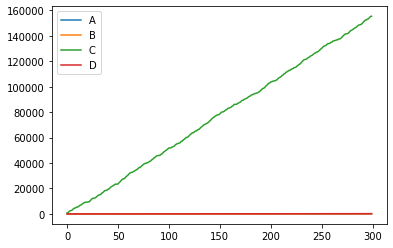

In [23]:
#누적된 값 > 데이터 증감에 대해 시각화 
# pandas.cumsum 

data_sum = df.cumsum()
data_sum.plot()

#RE



In [ ]:
# python re exercises 
# 1) https://www.w3resource.com/python-exercises/re/ 
# 2) https://learnbyexample.github.io/py_regular_expressions/Exercise_solutions.html
# 3) https://developers.google.com/edu/python/regular-expressions

In [27]:
import re 

# re.compile(pattern)
# 특정 기호 > 정규 표현식 객체로 전환 
pattern = '\W+'
re_pattern = re.compile(pattern)

# re.search(pattern, string)
# 문자열 정규 표현식에 해당하는 첫 부분 
re.search("(\w+)", "wow, it is awsome")

#re.split(pattern, string)
# 문자열에서 특정 패턴으로 문자열을 나눠서 리스트 만들기 
re.split('\W', 'wow, it is world of word')

# re.sub(pattern, repl, string)
# string에서 특정 pattern을 만족시키는 문자를 사용자가 정의한 문자 repl로 치환한다 
re.sub("\d", "number", "7 candy")

'number candy'

In [30]:
# Beautifulsoup 
# HTML 태그 제거 

from bs4 import BeautifulSoup 
str =  '<body> 이 글은 Beautiful Soup 라이브러리를 사용하는 방법에 대한 글 입니다. <br> </br> 라이브러리를 사용하면 쉽게 HTML 태그를 제거할 수 있습니다 </body>'

str = BeautifulSoup(str, "html5lib").get_text() #HTML 태그를 제외한 텍스트만 가져온다 

print(str)

 이 글은 Beautiful Soup 라이브러리를 사용하는 방법에 대한 글 입니다.   라이브러리를 사용하면 쉽게 HTML 태그를 제거할 수 있습니다 


In [32]:
# kaggle 
# kaggle API를 연동해서 받기 
!pip install -q kaggle

In [33]:
from google.colab import files 
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hyelimkim1234","key":"86ac1409fc37d42814e98eee8d53bb79"}'}

In [36]:
#create a kaggle folder 
# !mkdir ~/.kaggle # cannot run twice 

#move the kaggle.json to kaggle folder 
!cp kaggle.json ~/.kaggle/

In [37]:
#permission for json to act 
!chmod 600 ~/.kaggle/kaggle.json

In [41]:
!kaggle competitions download -c <'Bag of Words Meets Bags of Popcorn'>

/bin/bash: -c: line 0: syntax error near unexpected token `newline'
/bin/bash: -c: line 0: `kaggle competitions download -c <'Bag of Words Meets Bags of Popcorn'>'


In [42]:
# list all the competitions from kaggle 
!kaggle competitions list

ref                                                  deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                         2030-07-01 23:59:00  Getting Started     Prizes        241           False  
gan-getting-started                                  2030-07-01 23:59:00  Getting Started     Prizes        413           False  
tpu-getting-started                                  2030-06-03 23:59:00  Getting Started  Knowledge       1072           False  
digit-recognizer                                     2030-01-01 00:00:00  Getting Started  Knowledge       6988           False  
titanic                                              2030-01-01 00:00:00  Getting Started  Knowledge      87723           False  
house-prices-advanced-regression-techniques          2030-01-01 00:00:00  Getting Started 

In [44]:
# list all the available dataset from kaggle 
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              234KB  2021-08-04 12:58:15          10266  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           6281  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           2345  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2576  
fatiimaezzahra/famous-iconic-women                          Famous Iconic Wo

In [48]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 5.4 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73052 sha256=90ed3f314e5f132a9a0eaae992993d8b13ce2c3f23208429909f938e6f0ddf1b
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [49]:
# !kaggle competitions download -c word2vec-nlp-tutorial #403 forbidden 
# download the dataset > import it from google drive 

403 - Forbidden


#03. 자연어 처리 개요 
- 단어표현 
- 텍스트 분류
- 텍스트 유사도 
- 자연어 생성 
- 기계 이해 
- 데이터 이해하기 


#04.텍스트 분류

- 영어 텍스트 분류 
- 한글 텍스트 분류

#05.텍스트 유사도
- 문제 소개 
- 데이터 분석과 전처리 
- 모델링 
- 정리 

#06.챗봇 만들기
- 데이터 소개 
- 데이터 분석
- 시퀀스 투 시퀀스 모델 
- 트랜스포머 모델 
- 정리 

#07.사전 학습 모델 
- 버트 
- 버트를 활용한 미세 조정 학습 
- GPT 
- GPT2를 활용한 미세 조정 학습 
- 정리 